<a href="https://colab.research.google.com/github/MetroPlays/Plant_Classifier/blob/main/Plant_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 15.5 MB/s 
     |████████████████████████████████| 1.2 MB 40.2 MB/s 
     |████████████████████████████████| 48 kB 2.7 MB/s 
     |████████████████████████████████| 189 kB 44.2 MB/s 
     |████████████████████████████████| 56 kB 1.6 MB/s 
     |████████████████████████████████| 558 kB 41.6 MB/s 
     |████████████████████████████████| 51 kB 183 kB/s 
     |████████████████████████████████| 130 kB 45.0 MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!ls /content/gdrive/MyDrive/Colab\ Notebooks/Plant_Images

bridges  My_Test_Set  plants


In [7]:
#Azure key do not commit with key filled out!
key='key'

#Testing a few plants with key
zebra_test = search_images_bing(key, 'aphelandra squarrosa')
spider_test = search_images_bing(key, 'spider plant')

im1 = zebra_test.attrgot('thumbnailUrl')
im2 = spider_test.attrgot('thumbnailUrl')

print(len(im1))
print(im1[0], im1[1])
print(len(im2))
print(im2[0], im2[1])

150
https://tse4.mm.bing.net/th?id=OIP.GN4sEoGxjLlcEIYQbNz62gHaFU&pid=Api https://tse2.mm.bing.net/th?id=OIP.p-k-r4oJpVXzkRIobSmNnwHaJ4&pid=Api
150
https://tse3.mm.bing.net/th?id=OIP.-H4_S38cF0Z9dMRlRrwKOQHaJ4&pid=Api https://tse4.mm.bing.net/th?id=OIP.CbWL03lcwosE7HogjpPp4wHaFj&pid=Api


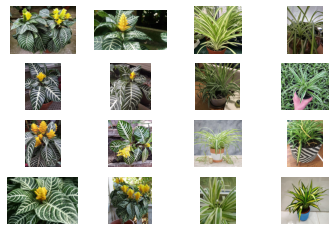

In [36]:
f, axes = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
      if j < 2:
        image_data = requests.get(im1[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
      else: 
        image_data = requests.get(im2[i+4*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))        
        axes[i][j].imshow(image)
        axes[i][j].axis("off")   
plt.show()

In [8]:
export_path = Path('/content/gdrive/MyDrive/Colab Notebooks/Plant_Images')

plant_types = ['aphelandra squarrosa', 'heart shaped philodendron', 'string of pearls', "baby's tears", 'monstera plants', 'spider plant', 'jade plant', 'chinese evergreen', 'small-leaf spiderwort', 'weeping fig', 'aloe vera', 'pearl plant', 'coppertone sedum', 'chin cactus', 'tiger lily', 'flax', 'poppy flower', 'tulips', 'mexican marigold']

path = export_path/'plants'

if not path.exists():
  path.mkdir()
  for plant in plant_types:
    save_to = (path/plant)
    save_to.mkdir(exist_ok=True)
    images = search_images_bing(key, plant)
    download_images(save_to, urls=images.attrgot('contentUrl'))